# 20.03 - PageRank - Edge Case 1
Notebooks 20.03, 20.04 and 20.05 introduce the PageRank algorithm using very specific edge cases. This particular notebook confirms that in a perfectly circular graph, no node can be seen as more important than any other node. This should and does result in a PageRank that is the same for all nodes in the graph

### Import

In [19]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

### Fonts

In [20]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Define our graph to test our algorithm

In [21]:
graph = [
    (1,2),
    (2,3),
    (3,4),
    (4,5),
    (5,1)]

### Coordinates for plotting purposes

In [22]:
coords = np.vstack((np.sin(np.linspace(0,360,6)[:-1]/180*np.pi),
                    np.cos(np.linspace(0,360,6)[:-1]/180*np.pi))).T

### Pagerank Algorithm

In [23]:
def compute_pageranks(pageranks,CP,PC,d,n,nodes):

    #Run Algorithm
    for node in nodes:
        parents = CP[node]
        pagerank_sum = 0
        for parent in parents:
            pagerank = pageranks[parent-1]
            parent_outdegree = len(PC[parent])
            pagerank_sum = pagerank_sum + (pagerank/parent_outdegree)

        #Update
        pageranks[node-1] = d/n + (1-d)*pagerank_sum
    
    #Return pageranks
    return pageranks

### Find the unique number of nodes

In [24]:
nodes = np.unique(np.array(graph))

### Create two graphs where we group edges together. 
One where the key is the child node, the values are al its parents (incoming edges).<br>
A second where we group by parent (key) and list all the outgoing edges. 

### Child <- Parent graph

In [25]:
CP = {}
for edge in graph:
    parent,child = edge
    if child not in CP:
        CP[child] = [parent]
    else:
        parents = CP[child]
        parents.append(parent)
        CP[child] = parents

### Parent <- Child graph

In [26]:
PC = {}
for edge in graph:
    parent,child = edge
    if parent not in PC:
        PC[parent] = [child]
    else:
        children = PC[parent]
        children.append(child)
        PC[parent] = children

### Init PageRank

In [27]:
d = 0.15
n = len(nodes)
pageranks = np.ones((n,1))

### Iterate

In [28]:
pageranks = np.ones((n,1))
prev_pageranks = np.ones((n,1))
deltas = []
for i in range(20):
    
    #Compute new pageranks
    pageranks = compute_pageranks(pageranks,CP,PC,d,n,nodes)
    
    #Compute the delta 
    delta = np.sum((prev_pageranks - pageranks)**2) / n
    deltas.append(delta)
    
    #Assign current to previous
    prev_pageranks = pageranks.copy()

### Plot the convergence

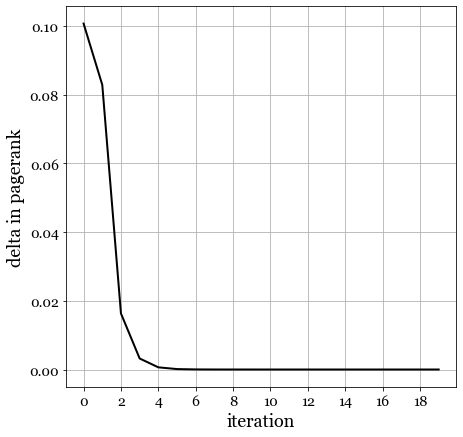

In [36]:

plt.figure(figsize=(7,7));
plt.plot(deltas,'k',linewidth=2);
plt.grid();
plt.xlabel('iteration',fontsize=18,**csfont);
plt.ylabel('delta in pagerank',fontsize=18,**csfont);
plt.xticks(range(0,20,2),fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.savefig('../../assets/figures/020/pagerank_0.png',dpi=300,bbox_inches="tight")

### Plot the resulting PageRanks on the graph

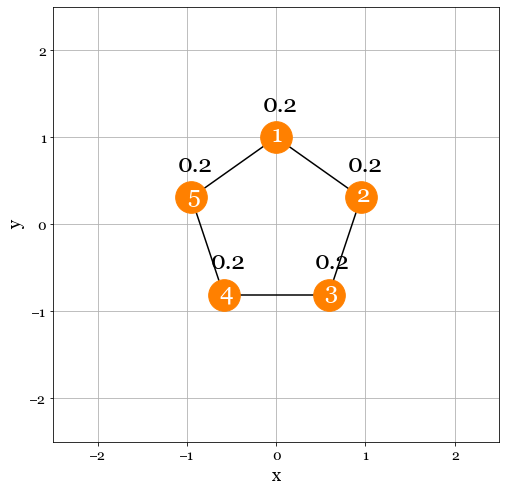

In [18]:
plt.figure(figsize=(8,8))
norm_pageranks = pageranks / np.max(pageranks)
for i in range(len(nodes)):
    pr = pageranks[i,0]
    norm_pr = norm_pageranks[i,0]
    pr = np.round(pr,2)
    plt.scatter(coords[i,0],coords[i,1],s=1000,color=(norm_pr,0.5,1-(norm_pr**2)),zorder=100)
    plt.text(coords[i,0]-0.05,coords[i,1]-0.05,str(i+1),
             color='white',
             zorder=101,
             fontsize=24,**csfont);
    plt.text(coords[i,0]-0.15,coords[i,1]+0.30,str(pr),
             color='black',
             zorder=101,
             fontsize=24,**csfont);
plt.axis((-2.5,2.5,-2.5,2.5))
plt.grid()
for edge in graph:
    left,right = edge
    plt.plot([coords[left-1,0],coords[right-1,0]],[coords[left-1,1],coords[right-1,1]],'k')
    
plt.xlabel('x',fontsize=18,**csfont);
plt.ylabel('y',fontsize=18,**csfont);
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.savefig('../../assets/figures/020/pagerank_1.png',dpi=300,bbox_inches="tight")    